In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from __future__ import division

In [3]:
# request module to import data
# api for gathering information
import requests

# string IO allows to work from csv to .read()
from StringIO import StringIO

In [4]:

# grab the data from the url
url = "http://elections.huffingtonpost.com/pollster/2016-general-election-trump-vs-clinton.csv"

# get information int ext form
source = requests.get(url).text

# avoid text problem with string IO
poll_data = StringIO(source)

In [5]:
# place in a pandas DF
poll_df = pd.read_csv(poll_data)

# get some information on the df
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 15 columns):
Pollster                  158 non-null object
Start Date                158 non-null object
End Date                  158 non-null object
Entry Date/Time (ET)      158 non-null object
Number of Observations    158 non-null int64
Population                158 non-null object
Mode                      158 non-null object
Clinton                   158 non-null int64
Trump                     158 non-null int64
Undecided                 145 non-null float64
Other                     84 non-null float64
Pollster URL              158 non-null object
Source URL                158 non-null object
Partisan                  158 non-null object
Affiliation               158 non-null object
dtypes: float64(2), int64(3), object(10)
memory usage: 18.6+ KB


In [6]:
# look at the top 5 rows
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Clinton,Trump,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation
0,ABC/Post,2016-05-16,2016-05-19,2016-05-22T15:35:17Z,829,Registered Voters,Live Phone,44,46,1.0,2.0,http://elections.huffingtonpost.com/pollster/p...,https://www.washingtonpost.com/page/2010-2019/...,Nonpartisan,None
1,Schoen (D),2016-05-16,2016-05-19,2016-05-22T17:13:42Z,1000,Likely Voters,Live Phone,44,42,14.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://big.assets.huffingtonpost.com/POTUSSCHO...,Pollster,Dem
2,NBC/WSJ,2016-05-15,2016-05-19,2016-05-22T15:22:23Z,1000,Registered Voters,Live Phone,46,43,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.nbcnews.com/meet-the-press/clinton-...,Pollster,Dem
3,Rasmussen,2016-05-17,2016-05-18,2016-05-19T15:56:23Z,1000,Likely Voters,Automated Phone,37,42,7.0,13.0,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None
4,Ipsos/Reuters,2016-05-14,2016-05-18,2016-05-19T18:33:20Z,1397,Registered Voters,Internet,41,36,9.0,14.0,http://elections.huffingtonpost.com/pollster/p...,http://big.assets.huffingtonpost.com/2016Reute...,Nonpartisan,None


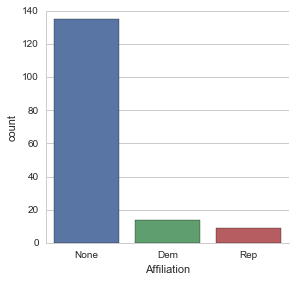

In [8]:
# Look if the poll are partizan
sns.factorplot('Affiliation', data=poll_df, kind='count')
# more democratic affiliations

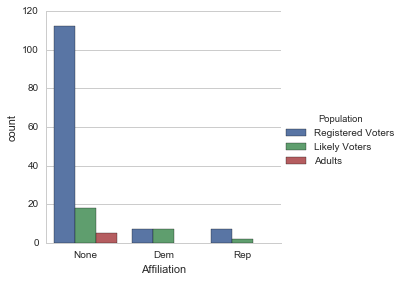

In [9]:
sns.factorplot('Affiliation', data = poll_df, hue = 'Population', kind = 'count')

In [10]:
# now we can look at average for Clinton, Trump, Undec, Others and undecided
avg = pd.DataFrame(poll_df.mean())

# 'Number of Observations' is just how many people they polled, we just need the actualy averages
avg.drop('Number of Observations', axis=0, inplace=True)
avg

,0
Clinton,46.202532
Trump,40.563291
Undecided,9.841379
Other,5.988095


In [11]:
# lets get the standard deviation
std = pd.DataFrame(poll_df.std())

std.drop('Number of Observations', axis=0, inplace=True)
std
# more uncertainty for Trump than Clinton

,0
Clinton,3.808739
Trump,4.226748
Undecided,5.135221
Other,5.367223


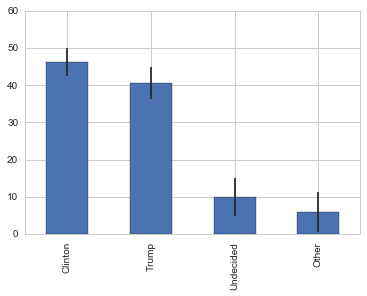

In [12]:
avg.plot(yerr= std, kind='bar', legend= False)
# we have the height of votes and the black bar is the std

In [13]:
# we can concatenate the two tables we have made
poll_avg = pd.concat([avg,std], axis=1)
poll_avg

,0,0
Clinton,46.202532,3.808739
Trump,40.563291,4.226748
Undecided,9.841379,5.135221
Other,5.988095,5.367223


In [14]:
# now lets rename the tables
poll_avg.columns = ['Average','STD']
poll_avg

,Average,STD
Clinton,46.202532,3.808739
Trump,40.563291,4.226748
Undecided,9.841379,5.135221
Other,5.988095,5.367223


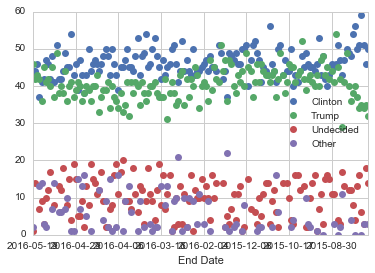

In [16]:
# quick and messy plot for plotting through time
poll_df.plot(x='End Date', y=['Clinton','Trump','Undecided','Other'], linestyle='', marker='o')
# notice reversed plotline

In [17]:
# we can edit the df to get more accurate estimate
# plot difference between obama and romney
from datetime import datetime

In [19]:
# define new column for difference
poll_df['Difference'] = (poll_df.Clinton - poll_df.Trump)/100

In [21]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Clinton,Trump,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Difference
0,ABC/Post,2016-05-16,2016-05-19,2016-05-22T15:35:17Z,829,Registered Voters,Live Phone,44,46,1.0,2.0,http://elections.huffingtonpost.com/pollster/p...,https://www.washingtonpost.com/page/2010-2019/...,Nonpartisan,None,-0.02
1,Schoen (D),2016-05-16,2016-05-19,2016-05-22T17:13:42Z,1000,Likely Voters,Live Phone,44,42,14.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://big.assets.huffingtonpost.com/POTUSSCHO...,Pollster,Dem,0.02
2,NBC/WSJ,2016-05-15,2016-05-19,2016-05-22T15:22:23Z,1000,Registered Voters,Live Phone,46,43,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.nbcnews.com/meet-the-press/clinton-...,Pollster,Dem,0.03
3,Rasmussen,2016-05-17,2016-05-18,2016-05-19T15:56:23Z,1000,Likely Voters,Automated Phone,37,42,7.0,13.0,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,-0.05
4,Ipsos/Reuters,2016-05-14,2016-05-18,2016-05-19T18:33:20Z,1397,Registered Voters,Internet,41,36,9.0,14.0,http://elections.huffingtonpost.com/pollster/p...,http://big.assets.huffingtonpost.com/2016Reute...,Nonpartisan,None,0.05


In [27]:
# so that start date is maintained
# get the mean at those dates
poll_df = poll_df.groupby(['Start Date'], as_index=False).mean()
poll_df.head()

,Start Date,Number of Observations,Clinton,Trump,Undecided,Other,Difference
0,2015-05-19,1711.0,50.0,32.0,14.0,3.0,0.18
1,2015-06-20,1000.0,46.0,35.0,18.0,NaN,0.11
2,2015-06-21,1005.0,51.0,34.0,3.0,3.0,0.17
3,2015-06-26,890.0,59.0,35.0,6.0,0.0,0.24
4,2015-07-09,1000.0,51.0,34.0,16.0,NaN,0.17


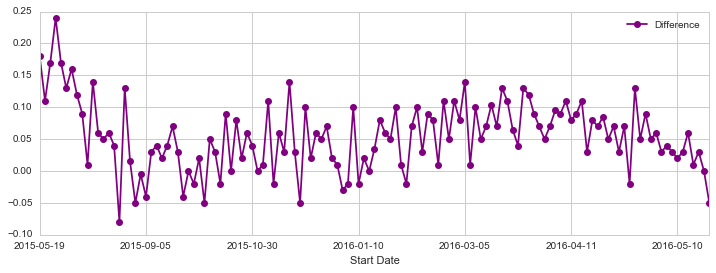

In [32]:
poll_df.plot('Start Date', 'Difference', figsize=(12,4), marker='o', linestyle='-', color='purple')